## Sea Water Potential Temperature (First Observation of final proj)

In [1]:
from cartopy import crs as ccrs, feature as cfeature        
import cmocean                   
import matplotlib.path as mpath   
import momlevel as ml             
import matplotlib.pyplot as plt
import zarr
import xarray as xr
import numpy as np
import cftime
import gcsfs 
import pandas as pd

In [2]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv') 
                                                                    #loading in  cmip6 data from google cloud
gcs = gcsfs.GCSFileSystem(token='anon')

In [3]:
esm4_basins = xr.open_dataset('/home/ees_student/Taboada_Final_G2/EES3506_5506_Fall2023_Final_Project_G4/data/basins/esm4_basins_gr.nc').basins
##loading in basin mask data

In [4]:
thetao126 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp126' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")
##isolating thetao from SSP126 scenerio in cmip6 data

In [5]:
thetao245 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp245' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")
##isolating thetao from SSP245 scenerio in cmip6 data

In [6]:
thetao585 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp585' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")
##isolating thetao from SSP585 scenerio in cmip6 data

In [7]:
esm4_thetao126 = thetao126.zstore.values[-1]  
esm4_thetao245 = thetao245.zstore.values[-1]
esm4_thetao585 = thetao585.zstore.values[-1]

In [8]:
mapper_esm4_thetao126 = gcs.get_mapper(esm4_thetao126)
gfdl_esm4_thetao126 = xr.open_zarr(mapper_esm4_thetao126,
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [9]:
mapper_esm4_thetao245 = gcs.get_mapper(esm4_thetao245)
gfdl_esm4_thetao245 = xr.open_zarr(mapper_esm4_thetao245,
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [10]:
mapper_esm4_thetao585 = gcs.get_mapper(esm4_thetao585)
gfdl_esm4_thetao585 = xr.open_zarr(mapper_esm4_thetao585,
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [11]:
##converting each thetao dataset to Kelvin to keep consistent with other climate model portion of project
thetao585_K = gfdl_esm4_thetao585+273.15 
thetao245_K = gfdl_esm4_thetao245+273.15
thetao126_K = gfdl_esm4_thetao126+273.15

In [12]:
##subtracting the first 20 years from the last 20 years of SSP585 for difference
first20_585 = thetao585_K.sel(
    time = slice('2015-01-16', '2035-12-16')).mean('time')

last20_585 = thetao585_K.sel(
    time = slice('2080-01-16', '2100-12-16')).mean('time')

diff_585 = last20_585-first20_585

In [13]:
##subtracting first 20 years from the last 20 years of SSP245 for difference
first20_245 = thetao245_K.sel(
    time = slice('2015-01-16', '2035-12-16')).mean('time')

last20_245 = thetao245_K.sel(
    time = slice('2080-01-16', '2100-12-16')).mean('time')

diff_245 = last20_245-first20_245

In [14]:
##subtracting first 20 years from the last 20 years of SSP126 for difference
first20_126 = thetao126_K.sel(
    time = slice('2015-01-16', '2035-12-16')).mean('time')

last20_126 = thetao126_K.sel(
    time = slice('2080-01-16', '2100-12-16')).mean('time')

diff_126 = last20_126-first20_126

Text(0.5, 0.98, 'Ocean Temperature Projections')

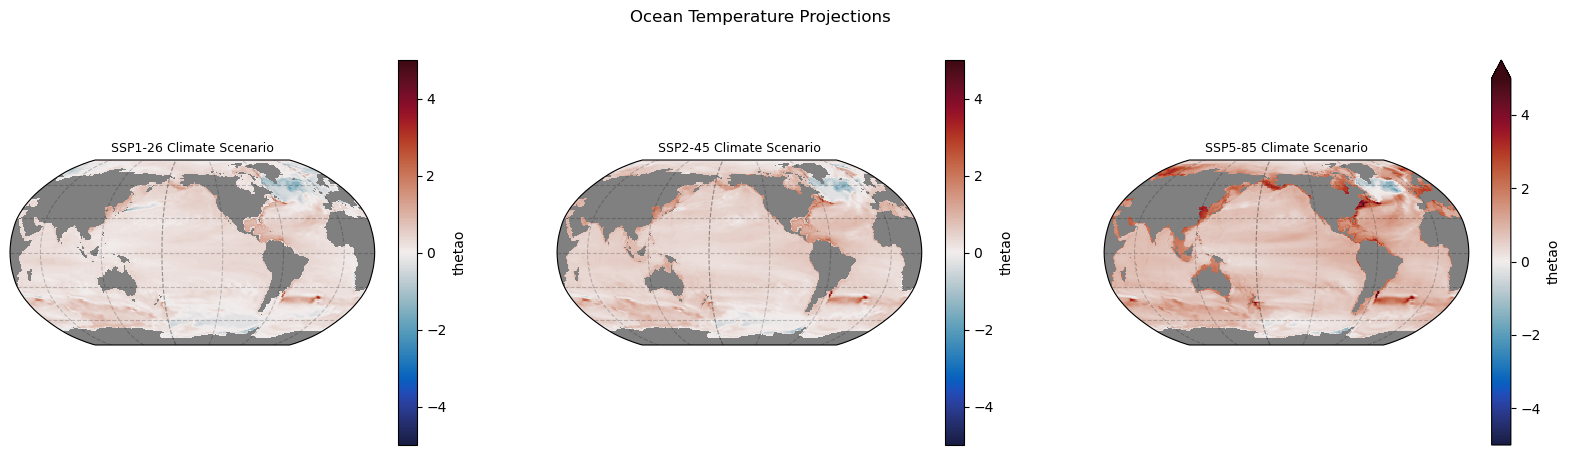

In [15]:
##global diff plots
subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150), 
         facecolor='grey') ## Make a dictionary to define the projection and face color

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), subplot_kw = subplot_kws)
##setting up subplot parameters

p1 = diff_126.mean(dim='lev').plot(ax = ax1, x='longitude', y='latitude', ##first plot of SSP1-26 scenario
            vmin=-5,vmax=5,
           cmap=cmocean.cm.balance,
           transform=ccrs.PlateCarree())

p2 = diff_245.mean(dim='lev').plot(ax = ax2, x='longitude', y='latitude', ##second plot of SSP2-45 scenario
               vmin=-5,vmax=5,
           cmap=cmocean.cm.balance,
           transform=ccrs.PlateCarree())

p3 = diff_585.mean(dim='lev').plot(ax = ax3, x='longitude', y='latitude', ##third plot of SSP5-85 scenario
               vmin=-5,vmax=5,
           cmap=cmocean.cm.balance,
           transform=ccrs.PlateCarree())

p1.axes.gridlines(color='black', alpha=0.2, linestyle='--') ##adding gridlines to each subplot
p2.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p3.axes.gridlines(color='black', alpha=0.2, linestyle='--')

ax1.set_title('SSP1-26 Climate Scenario', fontsize = 9) ##adding titles to each subplot
ax2.set_title('SSP2-45 Climate Scenario', fontsize = 9)
ax3.set_title('SSP5-85 Climate Scenario', fontsize = 9)

fig.suptitle("Ocean Temperature Projections")


##MEAN THE LEVELS

**Figure 1.** Increases in ocean temperature in three different GFDL-ESM4 climate scenarios: SSP5-85, SSP2-45, and SSP1-26. Temperature was originally measured in degrees Celsius and converted to Kelvin, and temperature values were averaged across ocean depth. 

Text(0.5, 1.0, 'Ocean Basin Mask')

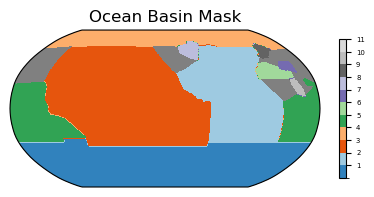

In [16]:
##Lookinag at the ocean basin mask 
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[5,3])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=5)
plt.title('Ocean Basin Mask',fontsize=12)

In [17]:
##assigning each basin to a variable
southernocean = (esm4_basins.where(esm4_basins==1) / esm4_basins.where(esm4_basins==1))
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2))
pacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
arcticocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

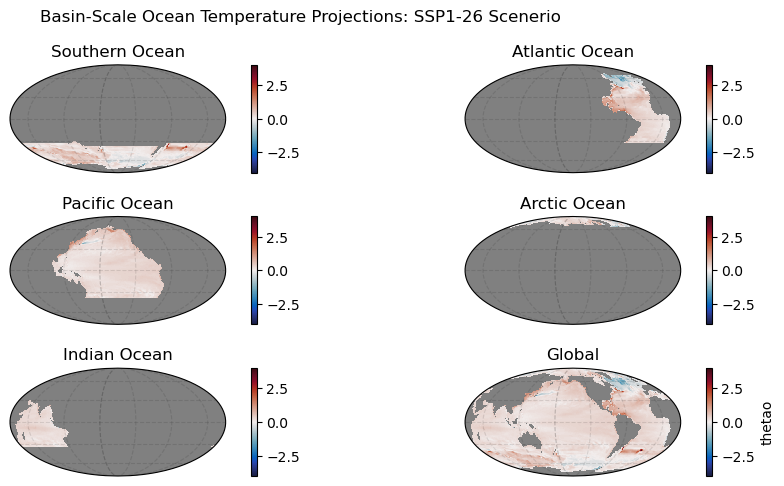

In [18]:
subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-150), ##set up SSP126 subplot
                 facecolor='grey')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws) 

##multiply each basin mask by diff for difference plot
(diff_126*southernocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                              ax=ax[0,0], 
                                              transform=ccrs.PlateCarree(), 
                                              vmin = -4, vmax = 4)

(diff_126*atlanticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                              ax=ax[0,1], 
                                              transform=ccrs.PlateCarree(), 
                                              vmin = -4, vmax = 4)

(diff_126*pacificocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                             ax=ax[1,0], 
                                             transform=ccrs.PlateCarree(), 
                                             vmin = -4, vmax = 4)

(diff_126*arcticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                            ax=ax[1,1], 
                                            transform=ccrs.PlateCarree(),
                                            vmin = -4, vmax = 4)

(diff_126*indianocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                            ax=ax[2,0], 
                                            transform=ccrs.PlateCarree(), 
                                            vmin = -4, vmax = 4)

diff_126.mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                              ax=ax[2,1], 
                              transform=ccrs.PlateCarree(), 
                              vmin = -4, vmax = 4)

ax[0,0].set_title('Southern Ocean')  ##subplot positions
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

ax[0,0].axes.gridlines(color='black', alpha=0.1, linestyle='--') ##adding gridlines to each subplot
ax[0,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')

fig.suptitle('Basin-Scale Ocean Temperature Projections: SSP1-26 Scenerio')
plt.tight_layout()

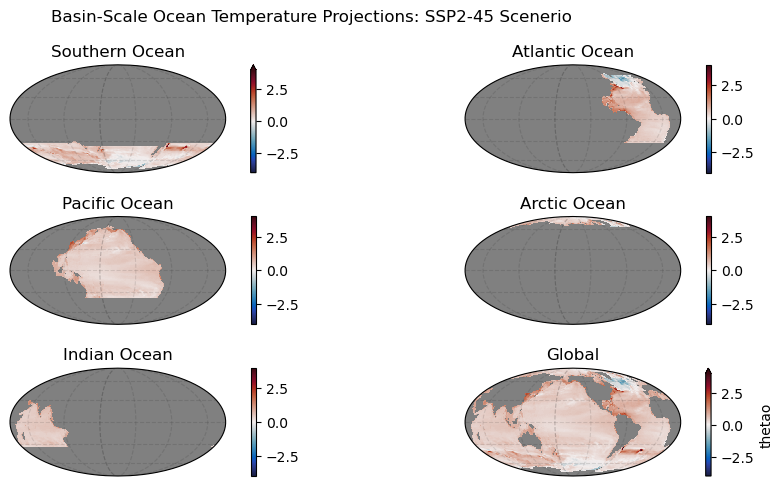

In [19]:
subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-150), ##set up SSP246 subplot
                 facecolor='grey')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)

##multiply each basin mask by diff for difference plot
(diff_245*southernocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                              ax=ax[0,0], transform=ccrs.PlateCarree(), 
                                              vmin = -4, vmax = 4)

(diff_245*atlanticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                              ax=ax[0,1], 
                                              transform=ccrs.PlateCarree(), 
                                              vmin = -4, vmax = 4)

(diff_245*pacificocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                             ax=ax[1,0],
                                             transform=ccrs.PlateCarree(), 
                                             vmin = -4, vmax = 4)

(diff_245*arcticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                            ax=ax[1,1],
                                            transform=ccrs.PlateCarree(), 
                                            vmin = -4, vmax = 4)

(diff_245*indianocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                            ax=ax[2,0], 
                                            transform=ccrs.PlateCarree(), 
                                            vmin = -4, vmax = 4)

diff_245.mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                              ax=ax[2,1],
                              transform=ccrs.PlateCarree(), 
                              vmin = -4, vmax = 4)

ax[0,0].set_title('Southern Ocean')  ##subplot positions
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

ax[0,0].axes.gridlines(color='black', alpha=0.1, linestyle='--') ##adding gridlines to each subplot
ax[0,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')

fig.suptitle('Basin-Scale Ocean Temperature Projections: SSP2-45 Scenerio')
plt.tight_layout()

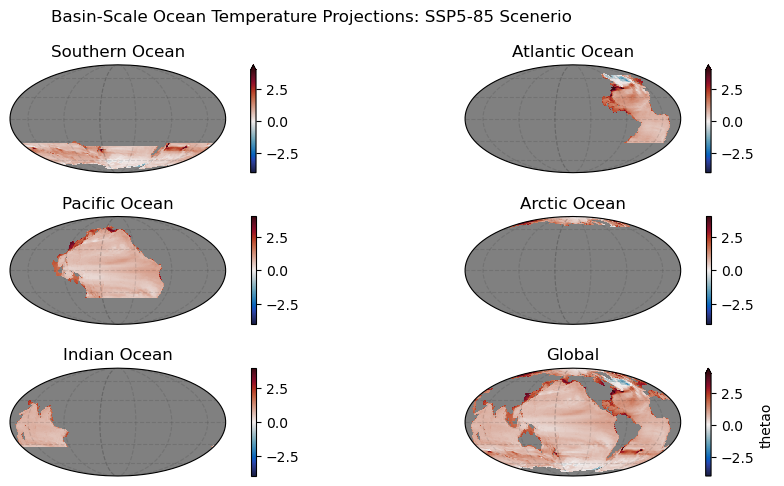

In [20]:
subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-150), ##set up SSP246 subplot
                 facecolor='grey')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)

##multiply each basin mask by diff for difference plot
(diff_585*southernocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                              ax=ax[0,0], 
                                              transform=ccrs.PlateCarree(), 
                                              vmin = -4, vmax = 4)

(diff_585*atlanticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                              ax=ax[0,1], 
                                              transform=ccrs.PlateCarree(), 
                                              vmin = -4, vmax = 4)

(diff_585*pacificocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                             ax=ax[1,0], 
                                             transform=ccrs.PlateCarree(), 
                                             vmin = -4, vmax = 4)

(diff_585*arcticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                            ax=ax[1,1], 
                                            transform=ccrs.PlateCarree(),
                                            vmin = -4, vmax = 4)

(diff_585*indianocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                                            ax=ax[2,0], 
                                            transform=ccrs.PlateCarree(), 
                                            vmin = -4, vmax = 4)


diff_585.mean(dim='lev').plot(cmap=cmocean.cm.balance, 
                              ax=ax[2,1],
                              transform=ccrs.PlateCarree(), 
                              vmin = -4, vmax = 4)

ax[0,0].set_title('Southern Ocean') ##subplot positions
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

ax[0,0].axes.gridlines(color='black', alpha=0.1, linestyle='--') ##adding gridlines to each subplot
ax[0,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')

fig.suptitle('Basin-Scale Ocean Temperature Projections: SSP5-85 Scenerio')
plt.tight_layout()

## Percent Difference

### SSP126

In [21]:
##SSP126 global percent dif
l20_126mean = last20_126.mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions globally
f20_126mean = first20_126.mean(dim=['lev', 'latitude', 'longitude']).values

percdif126 = [(l20_126mean - f20_126mean) / f20_126mean] #percent difference globally
percdif126[0]*100

0.08004683768376708

In [22]:
##SSP126 southern ocean perc dif
l20_126meanSOUTH = (last20_126*southernocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_126meanSOUTH = (first20_126*southernocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif126SOUTH = [(l20_126meanSOUTH - f20_126meanSOUTH) / f20_126meanSOUTH]  ##percent difference southern ocean 
percdif126SOUTH[0]*100

0.0743860073413544

In [23]:
##SSP126 atlantic ocean perc dif
l20_126meanATL = (last20_126*atlanticocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions atlantic 
f20_126meanATL = (first20_126*atlanticocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif126ATL = [(l20_126meanATL - f20_126meanATL) / f20_126meanATL]  ##percent difference atlantic ocean 
percdif126ATL[0]*100

0.07997132781068719

In [24]:
##SSP126 pacific ocean perc dif
l20_126meanPAC = (last20_126*pacificocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_126meanPAC = (first20_126*pacificocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif126PAC = [(l20_126meanPAC - f20_126meanPAC) / f20_126meanPAC]  ##percent difference southern ocean 
percdif126PAC[0]*100

0.0983292534043639

In [25]:
##SSP126 arctic ocean perc dif
l20_126meanARC = (last20_126*arcticocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_126meanARC = (first20_126*arcticocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif126ARC = [(l20_126meanARC - f20_126meanARC) / f20_126meanARC]  ##percent difference southern ocean 
percdif126ARC[0]*100

0.03973985011317173

In [26]:
##SSP126 indian ocean perc dif
l20_126meanIND = (last20_126*indianocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_126meanIND = (first20_126*indianocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif126IND = [(l20_126meanIND - f20_126meanIND) / f20_126meanIND]  ##percent difference southern ocean 
percdif126IND[0]*100

0.08607510414887226

### SSP245

In [27]:
##SSP245 global perc dif
l20_245mean = last20_245.mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions globally
f20_245mean = first20_245.mean(dim=['lev', 'latitude', 'longitude']).values

percdif245 = [(l20_245mean - f20_245mean) / f20_245mean] #percent difference globally
percdif245[0]*100

0.14280766481533647

In [28]:
##SSP585 southern ocean perc dif
l20_245meanSOUTH = (last20_245*southernocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_245meanSOUTH = (first20_245*southernocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif245SOUTH = [(l20_245meanSOUTH - f20_245meanSOUTH) / f20_245meanSOUTH]  ##percent difference southern ocean 
percdif245SOUTH[0]*100

0.1290383207231119

In [29]:
##SSP245 atlantic ocean perc dif
l20_245meanATL = (last20_245*atlanticocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions atlantic 
f20_245meanATL = (first20_245*atlanticocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif245ATL = [(l20_245meanATL - f20_245meanATL) / f20_245meanATL]  ##percent difference atlantic ocean 
percdif245ATL[0]*100

0.1566524287039403

In [30]:
##SSP245 pacific ocean perc dif
l20_245meanPAC = (last20_245*pacificocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_245meanPAC = (first20_245*pacificocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif245PAC = [(l20_245meanPAC - f20_245meanPAC) / f20_245meanPAC]  ##percent difference southern ocean 
percdif245PAC[0]*100

0.1563769679580171

In [31]:
##SSP245 arctic ocean perc dif
l20_245meanARC = (last20_245*arcticocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_245meanARC = (first20_245*arcticocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif245ARC = [(l20_245meanARC - f20_245meanARC) / f20_245meanARC]  ##percent difference southern ocean 
percdif245ARC[0]*100

0.09295315197524937

In [32]:
##SSP245 indian ocean perc dif
l20_245meanIND = (last20_245*indianocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_245meanIND = (first20_245*indianocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif245IND = [(l20_245meanIND - f20_245meanIND) / f20_245meanIND]  ##percent difference southern ocean 
percdif245IND[0]*100

0.16613219118458586

### SSP585

In [33]:
##SSP585 global perc dif
l20_585mean = last20_585.mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions globally
f20_585mean = first20_585.mean(dim=['lev', 'latitude', 'longitude']).values

percdif585 = [(l20_585mean - f20_585mean) / f20_585mean] #percent difference globally
percdif585[0]*100

0.2648683497682214

In [34]:
##SSP585 southern ocean perc dif
l20_585meanSOUTH = (last20_585*southernocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_585meanSOUTH = (first20_585*southernocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif585SOUTH = [(l20_585meanSOUTH - f20_585meanSOUTH) / f20_585meanSOUTH]  ##percent difference southern ocean 
percdif585SOUTH[0]*100

0.2413633384359245

In [35]:
##SSP585 atlantic ocean perc dif
l20_585meanATL = (last20_585*atlanticocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions atlantic 
f20_585meanATL = (first20_585*atlanticocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif585ATL = [(l20_585meanATL - f20_585meanATL) / f20_585meanATL]  ##percent difference atlantic ocean 
percdif585ATL[0]*100

0.3103286388541511

In [36]:
##SSP585 pacific ocean perc dif
l20_585meanPAC = (last20_585*pacificocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_585meanPAC = (first20_585*pacificocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif585PAC = [(l20_585meanPAC - f20_585meanPAC) / f20_585meanPAC]  ##percent difference southern ocean 
percdif585PAC[0]*100

0.2623433259453455

In [37]:
##SSP585 arctic ocean perc dif
l20_585meanARC = (last20_585*arcticocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_585meanARC = (first20_585*arcticocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif585ARC = [(l20_585meanARC - f20_585meanARC) / f20_585meanARC]  ##percent difference southern ocean 
percdif585ARC[0]*100

0.24350781454727885

In [43]:
##SSP585 indian ocean perc dif
l20_585meanIND = (last20_585*indianocean).mean(dim=['lev', 'latitude', 'longitude']).values ##fixing dimensions southern ocean 
f20_585meanIND = (first20_585*indianocean).mean(dim=['lev', 'latitude', 'longitude']).values

percdif585IND = [(l20_585meanIND - f20_585meanIND) / f20_585meanIND]  ##percent difference southern ocean 
percdif585IND[0]*100

0.27302639326833805

## Average Temperature

### SSP 126

In [56]:
## Global avg temp Kelvin
thetao126_K.mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(280.15033, dtype=float32)

In [57]:
## Global avg temp Southern Ocean
(thetao126_K*southernocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(276.80936586)

In [58]:
## Global avg temp Atlantic Ocean
(thetao126_K*atlanticocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(283.91027273)

In [59]:
## Global avg temp Pacific Ocean
(thetao126_K*pacificocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(282.63783503)

In [60]:
## Global avg temp Arctic Ocean
(thetao126_K*arcticocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(273.24550055)

In [61]:
## Global avg temp Indian Ocean
(thetao126_K*indianocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(285.13786879)

### SSP 245

In [50]:
## Global avg temp Kelvin
thetao245_K.mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(280.22223, dtype=float32)

In [51]:
## Global avg temp Southern Ocean
(thetao245_K*southernocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(276.87649488)

In [52]:
## Global avg temp Atlantic Ocean
(thetao245_K*atlanticocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(284.0068456)

In [53]:
## Global avg temp Pacific Ocean
(thetao245_K*pacificocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(282.70102058)

In [54]:
## Global avg temp Arctic Ocean
(thetao245_K*arcticocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(273.30003773)

In [55]:
## Global avg temp Indian Ocean
(thetao245_K*indianocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(285.22636791)

### SSP 585

In [44]:
## Global avg temp Kelvin
thetao585_K.mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(280.34616, dtype=float32)

In [45]:
## Global avg temp Southern Ocean
(thetao585_K*southernocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(276.99819704)

In [46]:
## Global avg temp Atlantic Ocean
(thetao585_K*atlanticocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(284.15425335)

In [47]:
## Global avg temp Pacific Ocean
(thetao585_K*pacificocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(282.82122857)

In [48]:
## Global avg temp Arctic Ocean
(thetao585_K*arcticocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(273.40356693)

In [49]:
## Global avg temp Indian Ocean
(thetao585_K*indianocean).mean(dim=['lev', 'latitude', 'longitude', 'time']).values

array(285.34147488)

## <span style="color:red"> What is heat content? (check units and what heat capacity of sea water is in our units)

"Heat content" refers to the amount of heat per unit of mass. In this context, heat content of the ocean at an averaged depth is measured in GJ/kg. 

Sea water must have a heat content of 3990 J/kg to cause an increase in sea water temperature by one Kelvin. Examining the changes in heat content over three different climate scenarios will give more intuitive results than measuring changes in temperature alone.

Tasks left:
- ~~basin scale diff plots~~
- ~comments~ esm4_thetao???
- figure caps
- ~math~
    - ~averages~
    - ~perc change~
- markdown about heat content
- math on slideshow
- markdown and scenerio on slideshow